In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from timeit import timeit
pd.set_option('display.max_rows', 500)

In [215]:
df = pd.read_csv(r'C:\eBEST\xingAPI\result.csv',usecols = ['data','shname','shcode','open','high','low','close','following open'])
df.columns = ['date','shname','shcode','open','high','low','close','following open']
df.sort_values(by = 'date',ascending = False,inplace=True)
df.drop(index= [1822,3512,3067,4198,4428,3734], inplace = True, axis=1)
df['maintenance'] = np.where(df['high'] == df['close'], 'O','')
df['profit rate'] = df['following open']  / df['close'] -1

전체

집계기간: 20191115 ~ 20211119
집계일수: 498
상한가 터치 건수: 4715
상한가 터치 종목 수: 1498
하루 평균 상한가 터치 건수: 9.47
하루 평균 overnight 수익률: 4.5%
하루 최소 overnight 수익률: -40.52%
하루 최대 overnight 수익률: 30.0%
overnight 수익률 표준편차: 8.59%


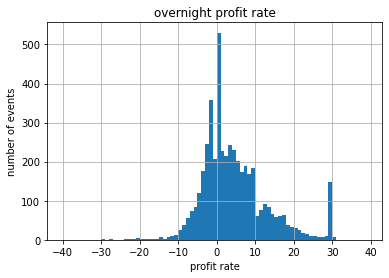



Case1: 상한가 touch & 상한가 is 종가

케이스 건수: 3064
전체 건수 대비 비율: 64.98%
해당 종목 수: 1188
하루 평균 건수: 6.16
하루 평균 overnight 수익률: 6.98%
하루 최대 overnight 수익률: 30.0%
하루 최소 overnight 수익률: -40.52%
overnight 수익률 표준편차: 9.13%


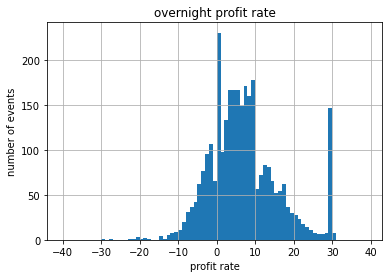



Case2: 상한가 touch & 상한가 is not 종가

케이스 건수: 1651
전체 건수 대비 비율: 35.02%
해당 종목 수: 1003
하루 평균 건수: 6.16
하루 평균 overnight 수익률: -0.11%
하루 최대 overnight 수익률: 29.84%
하루 최소 overnight 수익률: -29.58%
overnight 수익률 표준편차: 4.83%


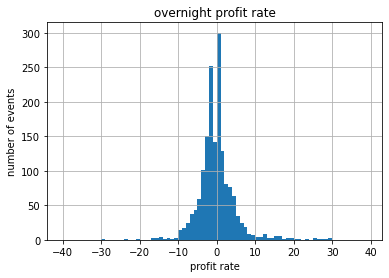

In [281]:
print('전체')
print()
print('집계기간:', df['date'].min(), '~', df['date'].max())
print('집계일수:', df['date'].nunique())
print('상한가 터치 건수:', len(df))
print('상한가 터치 종목 수:',df['shcode'].nunique())
print('하루 평균 상한가 터치 건수:', round(len(df)/df['date'].nunique(),2))
print('하루 평균 overnight 수익률:', str(round(100*df['profit rate'].mean(),2))+'%')
print('하루 최소 overnight 수익률:', str(round(100*df['profit rate'].min(),2))+'%')
print('하루 최대 overnight 수익률:', str(round(100*df['profit rate'].max(),2))+'%')
print('overnight 수익률 표준편차:', str(round(100*df['profit rate'].std(),2))+'%')
plt.hist(df['profit rate']*100, bins = [(x-40) for x in range(80)])
plt.title('overnight profit rate')
plt.xlabel('profit rate')
plt.ylabel('number of events')
plt.grid(True)
plt.show()
print()
print()
print('Case1: 상한가 touch & 상한가 is 종가')
print()
print('케이스 건수:', len(df[df['maintenance']=='O']))
print('전체 건수 대비 비율:', str(round(len(df[df['maintenance'] == 'O']) / len(df),4)*100)+'%')
print('해당 종목 수:', df[df['maintenance']=='O']['shcode'].nunique())
print('하루 평균 건수:', round(len(df[df['maintenance']=='O'])/df[df['maintenance']=='O']['date'].nunique(),2))
print('하루 평균 overnight 수익률:', str(round(df[df['maintenance']=='O']['profit rate'].mean()*100,2)) + '%')
print('하루 최대 overnight 수익률:', str(round(df[df['maintenance']=='O']['profit rate'].max()*100,2)) + '%')
print('하루 최소 overnight 수익률:', str(round(df[df['maintenance']=='O']['profit rate'].min()*100,2)) + '%')
print('overnight 수익률 표준편차:', str(round(df[df['maintenance']=='O']['profit rate'].std()*100,2)) + '%')
plt.hist(df[df['maintenance']=='O']['profit rate']*100, bins = [(x-40) for x in range(80)])
plt.title('overnight profit rate')
plt.xlabel('profit rate')
plt.ylabel('number of events')
plt.grid(True)
plt.show()
print()
print()
print('Case2: 상한가 touch & 상한가 is not 종가')
print()
print('케이스 건수:' , len(df[df['maintenance']!='O']))
print('전체 건수 대비 비율:', str(round(1 - len(df[df['maintenance'] == 'O']) / len(df),4)*100)+'%')
print('해당 종목 수:', df[df['maintenance']!='O']['shcode'].nunique())
print('하루 평균 건수:', round(len(df[df['maintenance']=='O'])/df[df['maintenance']=='O']['date'].nunique(),2) )
print('하루 평균 overnight 수익률:',  str(round(df[df['maintenance']!='O']['profit rate'].mean()*100,2)) + '%')
print('하루 최대 overnight 수익률:',  str(round(df[df['maintenance']!='O']['profit rate'].max()*100,2)) + '%')
print('하루 최소 overnight 수익률:',  str(round(df[df['maintenance']!='O']['profit rate'].min()*100,2)) + '%')
print('overnight 수익률 표준편차:',  str(round(df[df['maintenance']!='O']['profit rate'].std()*100,2)) + '%')
plt.hist(df[df['maintenance']!='O']['profit rate']*100, bins = [(x-40) for x in range(80)])
plt.title('overnight profit rate')
plt.xlabel('profit rate')
plt.ylabel('number of events')
plt.grid(True)
plt.show()